In [2]:
import numpy as np
import pandas as pd
import os
import json
import pickle

In [3]:
with open('lang_dict_3_gram.json', 'r') as f:
    lang_dict_n_gram = pickle.load(f)

In [4]:
print(len(lang_dict_n_gram['en'].keys()))
print(lang_dict_n_gram['en']['the'])

4100
5480


In [5]:
test_data, test_labels = [], []
with open("/workspace/lang-detect/europarl.test", "r") as f:
    for line in f:
        line = line.split()
        test_data.append(" ".join(line[1:]))
        test_labels.append(line[0])
print(test_data[0], test_labels[0])

('"\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 2020" \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82\xd0\xb0\xd1\x80\xd1\x82\xd0\xb8\xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe\xd0\xbd\xd0\xba\xd1\x83\xd1\x80\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0\xd1\x80\xd0\xb0\xd1\x82\xd0\xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0\xb7\xd1\x85\xd0\xbe\xd0\xb4 \xd1\x81 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb8\xd0\xb7\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f.', 'bg')


In [6]:
print(len(test_data))

21000


In [7]:
import utils

for i in range(len(test_data)):
    test_data[i] = utils.preprocess(test_data[i])

new_data = [0]*len(test_data)

for i in range(len(test_data)):
    new_data[i] = utils.create_n_gram(test_data[i], 3)

In [8]:
new_data[:2]

['\xd0\x95\xd0 \x95\xd0\xb2 \xd0\xb2\xd1 \xb2\xd1\x80 \xd1\x80\xd0 \x80\xd0\xbe \xd0\xbe\xd0 \xbe\xd0\xbf \xd0\xbf\xd0 \xbf\xd0\xb0 \xd0\xbd\xd0 \xbd\xd0\xb5 \xd1\x82\xd1 \x82\xd1\x80 \xd1\x80\xd1 \x80\xd1\x8f \xd1\x8f\xd0 \x8f\xd0\xb1 \xd0\xb1\xd0 \xb1\xd0\xb2 \xd0\xb2\xd0 \xb2\xd0\xb0 \xd0\xb4\xd0 \xb4\xd0\xb0 \xd1\x81\xd1 \x81\xd1\x82 \xd1\x82\xd0 \x82\xd0\xb0 \xd0\xb0\xd1 \xb0\xd1\x80 \xd1\x80\xd1 \x80\xd1\x82 \xd1\x82\xd0 \x82\xd0\xb8 \xd0\xb8\xd1 \xb8\xd1\x80 \xd1\x80\xd0 \x80\xd0\xb0 \xd0\xbd\xd0 \xbd\xd0\xbe \xd0\xbe\xd0 \xbe\xd0\xb2 \xd0\xba\xd0 \xba\xd0\xbe \xd0\xbe\xd0 \xbe\xd0\xbd \xd0\xbd\xd0 \xbd\xd0\xba \xd0\xba\xd1 \xba\xd1\x83 \xd1\x83\xd1 \x83\xd1\x80 \xd1\x80\xd0 \x80\xd0\xb5 \xd0\xb5\xd0 \xb5\xd0\xbd \xd0\xbd\xd1 \xbd\xd1\x82 \xd1\x82\xd0 \x82\xd0\xb5 \xd0\xb5\xd0 \xb5\xd0\xbd \xd0\xbc\xd0 \xbc\xd0\xb0 \xd0\xb0\xd1 \xb0\xd1\x80 \xd1\x80\xd0 \x80\xd0\xb0 \xd0\xb0\xd1 \xb0\xd1\x82 \xd1\x82\xd0 \x82\xd0\xbe \xd0\xbe\xd0 \xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0 \xb8\xd0\xb7 \

In [9]:
# Based on total occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += lang_dict_n_gram[key][token]
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [10]:
print(len(output_labels), len(test_labels))

(21000, 21000)


In [11]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 91.85238095238095)


In [12]:
# Based on 0-1 occurence
output_labels = []
for i in range(len(new_data)):
    count = {}
    for key in lang_dict_n_gram.keys():
        count[key] = 0
    for token in new_data[i].split():
        for key in lang_dict_n_gram.keys():
            if token in lang_dict_n_gram[key]:
                count[key] += 1
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [13]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 97.64285714285714)


#### **Accuracy based on 0-1 occurence is 97.6% which is awesome while if we include total frequency of each token, then the accuracy reduces to 91.8% which is not bad either.**

In [14]:
# Test few cases where this model didn't work
num_case = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        print(new_data[i])
        print("Actual Language {0} | Predicted Language {1}".format(test_labels[i], output_labels[i]))
        count = {}
        for key in lang_dict_n_gram.keys():
            count[key] = 0
        for token in new_data[i].split():
            for key in lang_dict_n_gram.keys():
                if token in lang_dict_n_gram[key]:
                    count[key] += 1
        print(count)
        print("--------------------------------")
        num_case += 1
        if num_case == 10:
            break

co jsm sme tí ím teh ehd hdy dal ali naj aje jev evo
Actual Language cs | Predicted Language sk
{'pl': 7, 'el': 4, 'fr': 7, 'bg': 3, 'nl': 7, 'ro': 8, 'pt': 9, 'de': 8, 'sv': 7, 'da': 8, 'lv': 9, 'cs': 10, 'lt': 8, 'en': 7, 'sk': 11, 'sl': 9, 'it': 7, 'et': 9, 'hu': 10, 'fi': 10, 'es': 8}
--------------------------------
jme men eno nov ova val ali se wil ill lli lia iam mey eye yer ber ern rna nar ard sta tar ari rie reg egi gin ina nal ald pik ike tho hom oma mas sha haw jam ame mes mcl cle lei eis ish arc rch chi hib iba bal ald bar arr rro row owm wma man a alb lbe ber ert rob obe ber ert rts a vš ši �ic ich chn hni bud udo dou v sob obo bot otu vyz yzn zna nam ame men en� ná án �ni
Actual Language cs | Predicted Language sk
{'pl': 76, 'el': 44, 'fr': 74, 'bg': 38, 'nl': 74, 'ro': 65, 'pt': 73, 'de': 73, 'sv': 72, 'da': 69, 'lv': 68, 'cs': 78, 'lt': 75, 'en': 74, 'sk': 79, 'sl': 72, 'it': 66, 'et': 75, 'hu': 75, 'fi': 74, 'es': 73}
--------------------------------
nem em� má ám �me

#### **If we actually notice the difference between actual language and predicted language, we see very less difference in terms of occurence of words/trigrams.**

In [15]:
# Lets check which language has most wrong predictions
wrong_pred = {}
for key in lang_dict_n_gram.keys():
    wrong_pred[key] = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        wrong_pred[test_labels[i]] += 1
print(wrong_pred)

{'pl': 0, 'el': 0, 'fr': 12, 'bg': 0, 'nl': 7, 'ro': 9, 'pt': 20, 'de': 21, 'sv': 21, 'da': 32, 'lv': 1, 'cs': 8, 'lt': 4, 'en': 66, 'sk': 62, 'sl': 34, 'it': 92, 'et': 27, 'hu': 1, 'fi': 16, 'es': 62}


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

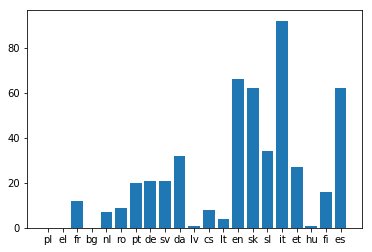

In [17]:
plt.bar(wrong_pred.keys(), wrong_pred.values())
plt.show()

The most number of mismatches happened with italian(it) - 92, english(en) - 66, slovak(sk) - 62 and spanish(es) - 62. While bulgarian(bg), polish(pl) and greek(el) has true positive rate 1. Another thing to notice from the base model is that, for that bulgarian and greek had the least TPR while in this model they have the highest TPR. For italian, english and spanish language, TPR was higher in base model while they have least TPR in the n-gram model.

In [57]:
# Convert the classes to numbers
classes_map = {}
classes = []
for ind, key in enumerate(count.keys()):
    classes_map[key] = ind
    classes.append(key)

test_labels_n, output_labels_n = [], []
for i in range(len(test_labels)):
    test_labels_n.append(classes_map[test_labels[i]])
    output_labels_n.append(classes_map[output_labels[i]])

Text(123,0.5,'True')

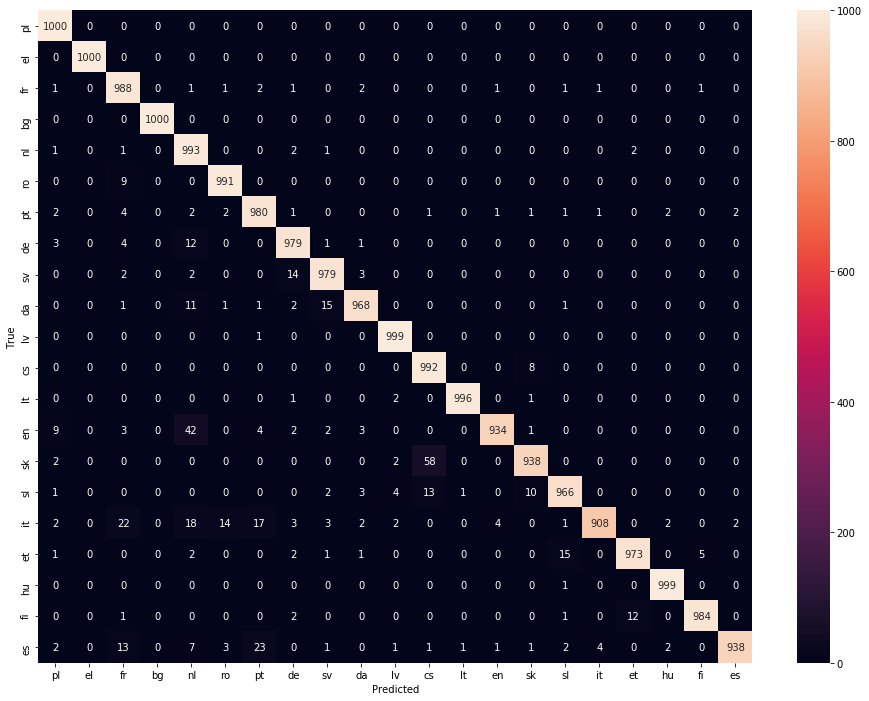

In [58]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels_n, output_labels_n)

import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(cnf_matrix, annot=True, fmt='g',ax=ax)
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.xlabel('Predicted')
plt.ylabel('True')

From confusion matrix we can seee that 42 English(en) sentences are classified as Dutch(nl). Lets see what are those sentences.

In [61]:
counter = 0
for i in range(len(output_labels)):
    if (output_labels[i] == 'nl') and (test_labels[i] == 'en'):
        print(test_data[i])
        print(new_data[i])
        print("----------------------------------------------")
        counter += 1
    if counter == 5:
        break

SK dear colleagues it saddens me very much that the situation concerning democracy human rights and the rule of law has not been improving in belarus 
SK dea ear col oll lle lea eag agu gue ues it sad add dde den ens me ver ery muc uch tha hat the sit itu tua uat ati tio ion con onc nce cer ern rni nin ing dem emo moc ocr cra rac acy hum uma man rig igh ght hts and the rul ule of law has not bee een imp mpr pro rov ovi vin ing in bel ela lar aru rus
----------------------------------------------
A constructive response to it from the european union is overdue and necessary 
A con ons nst str tru ruc uct cti tiv ive res esp spo pon ons nse to it fro rom the eur uro rop ope pea ean uni nio ion is ove ver erd rdu due and nec ece ces ess ssa sar ary
----------------------------------------------
and he is right of course 
and he is rig igh ght of cou our urs rse
----------------------------------------------
capital adequacy of financial institutions 
cap api pit ita tal ade deq equ qua ua

**Could 4-gram model help?**